price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
Anzahl NaN in Bedrooms: 0
Anzahl NaN in Bathrooms: 0


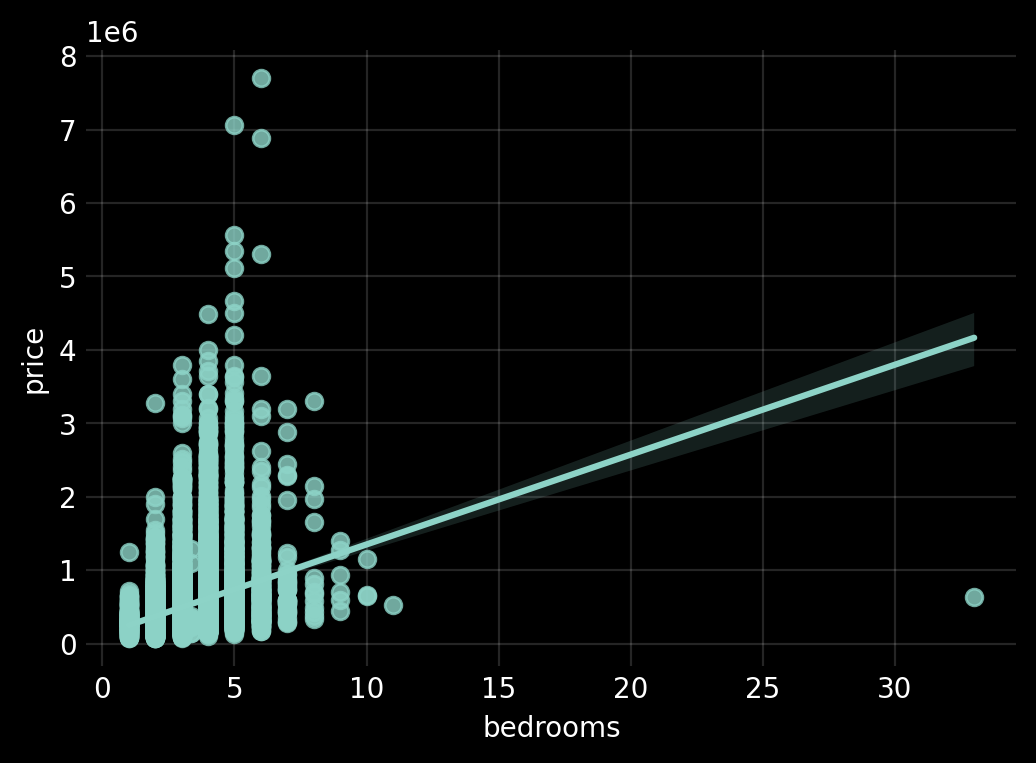

pcoeff: 0.31, pvalue: 0.0


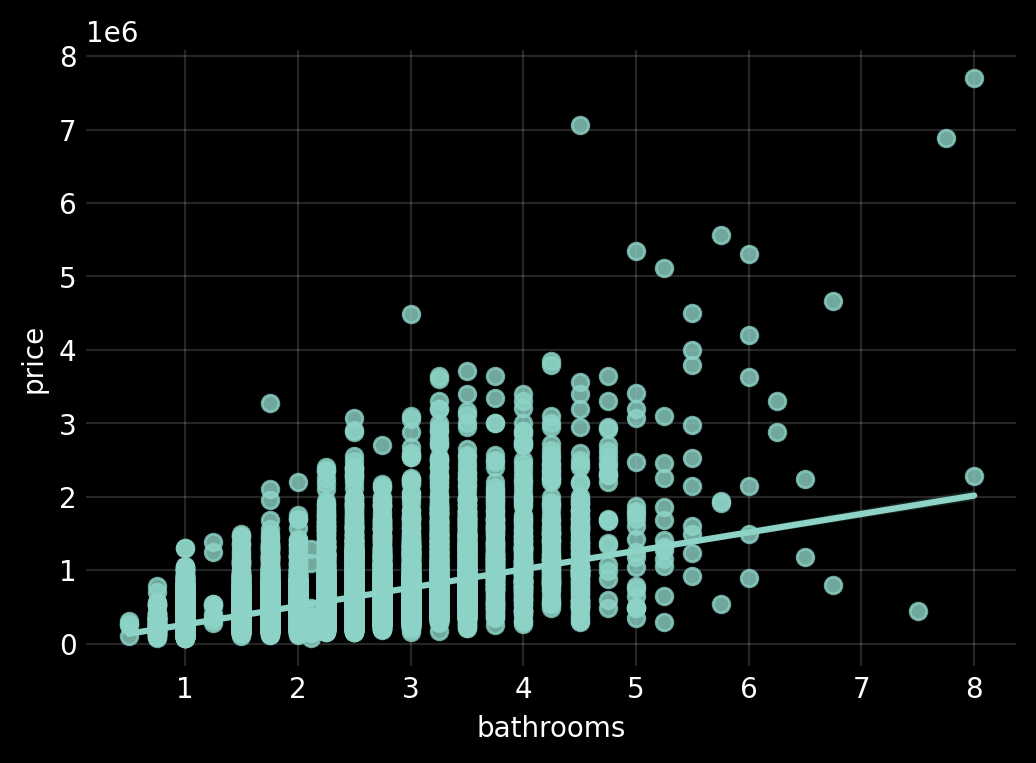

pcoeff: 0.53, pvalue: 0.0


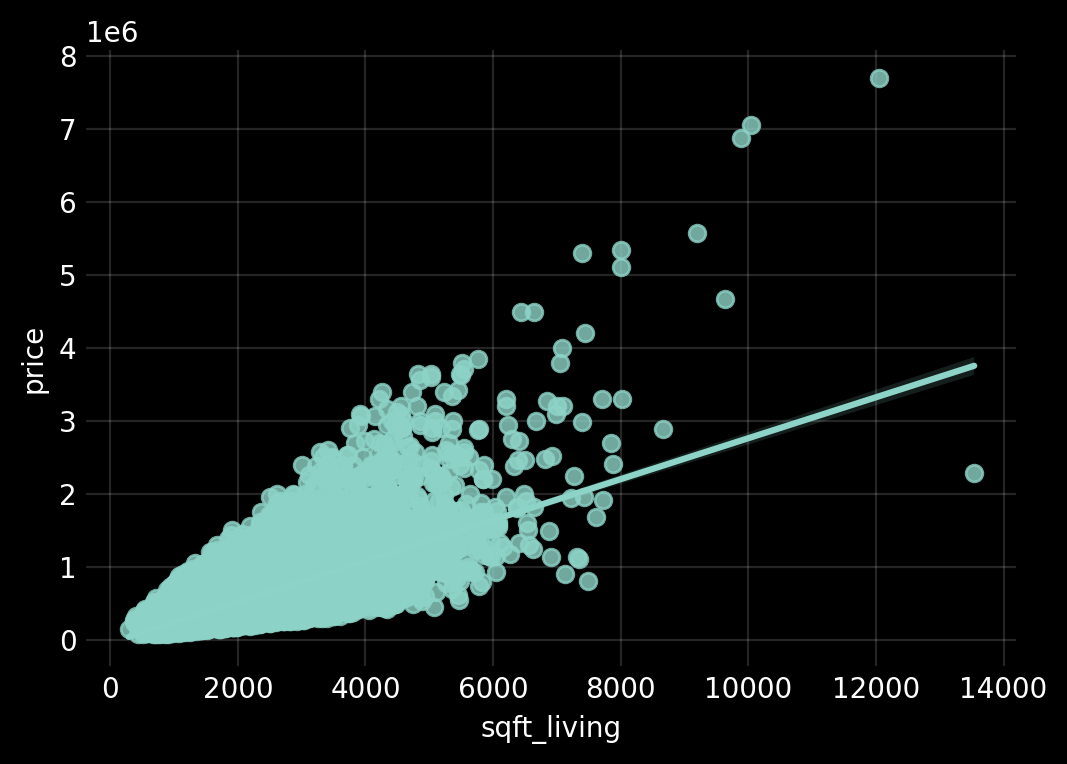

pcoeff: 0.70, pvalue: 0.0


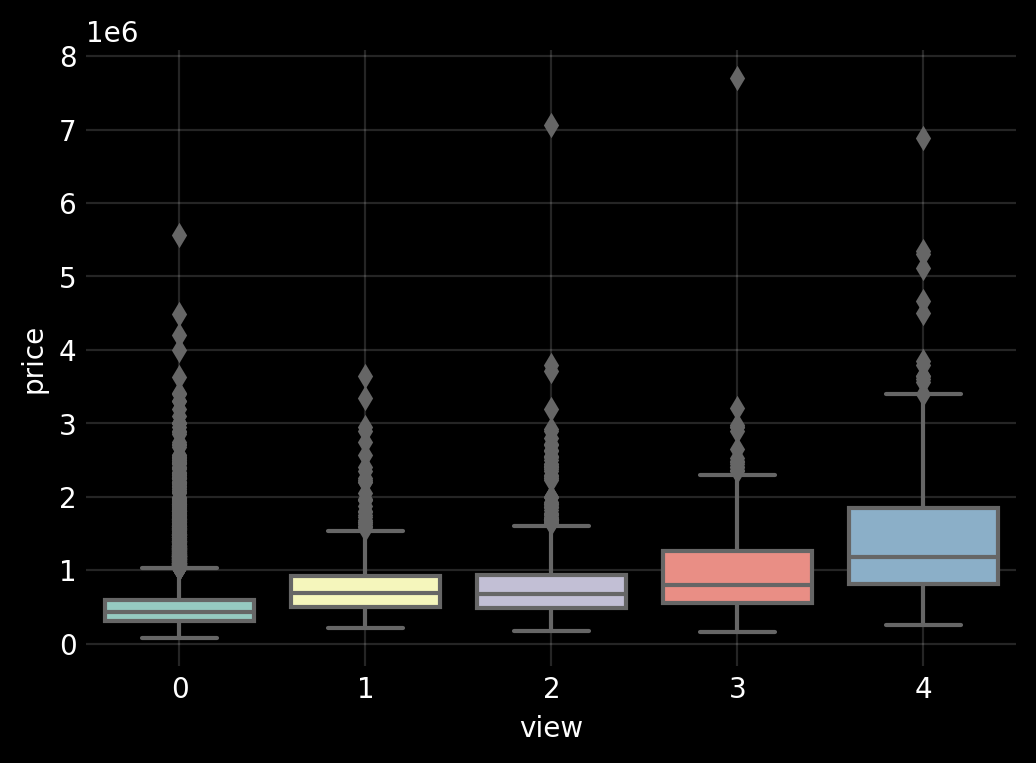

pcoeff: 0.40, pvalue: 0.0


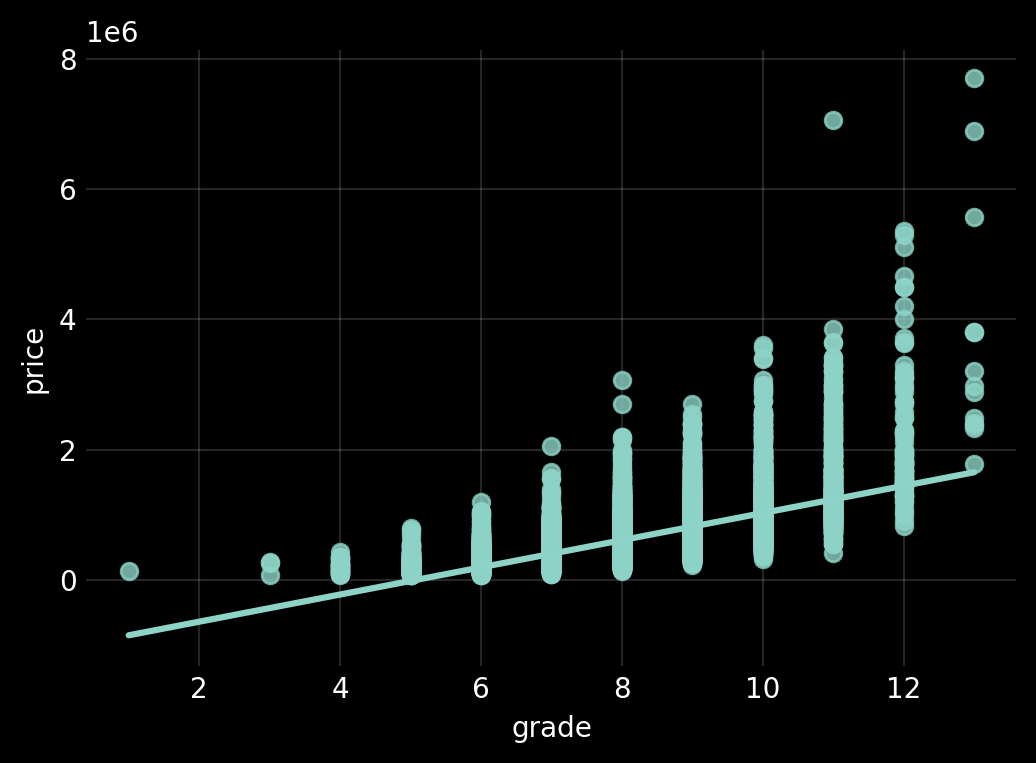

pcoeff: 0.67, pvalue: 0.0


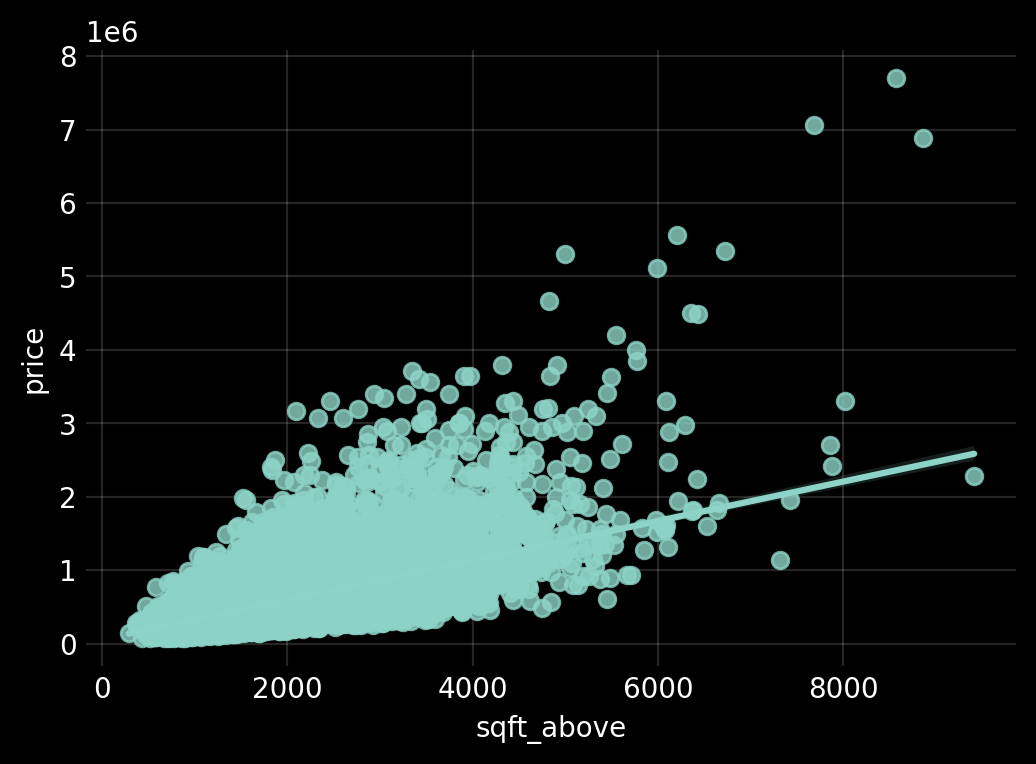

pcoeff: 0.61, pvalue: 0.0


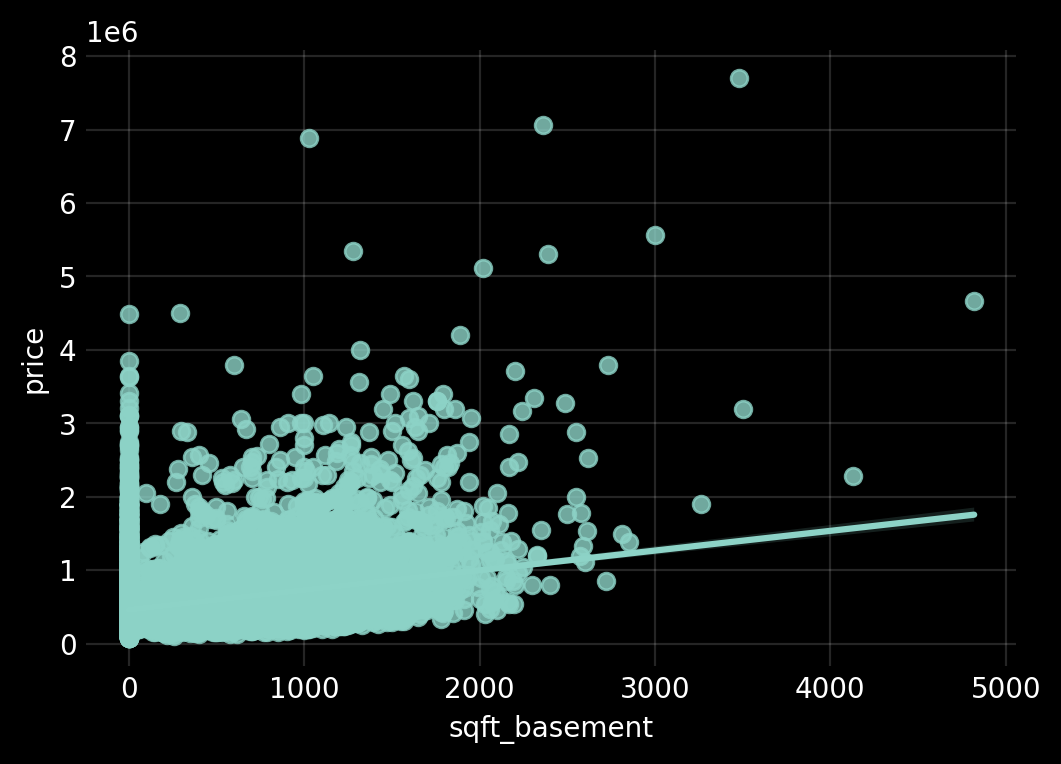

pcoeff: 0.32, pvalue: 0.0


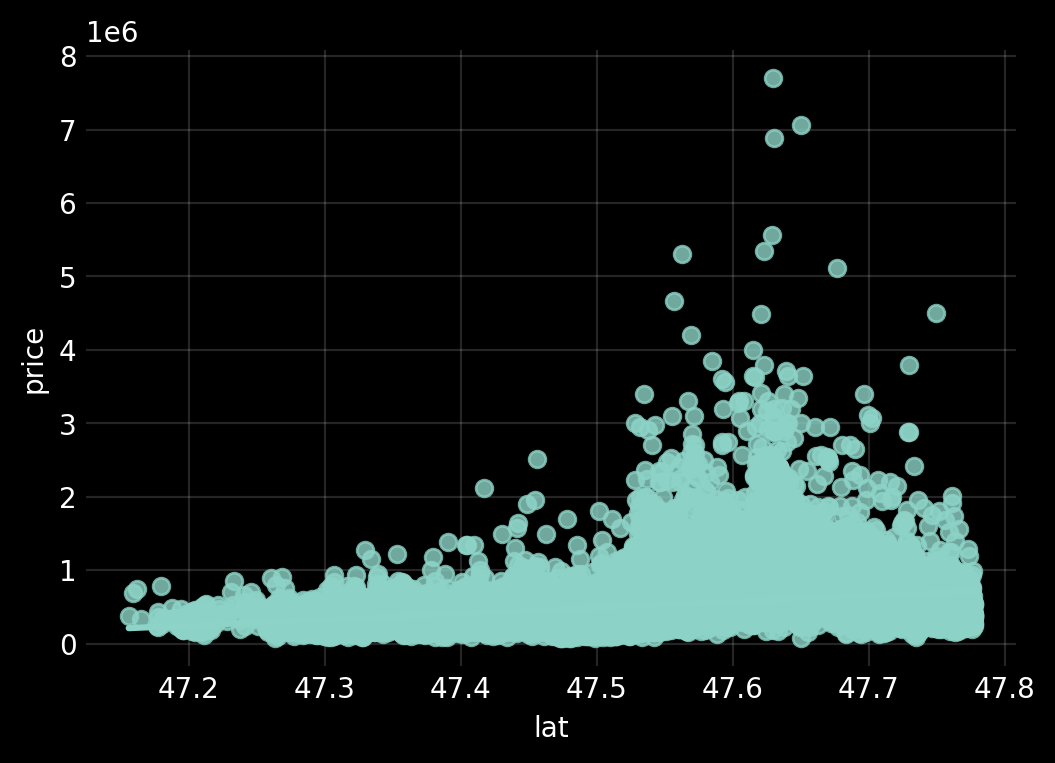

pcoeff: 0.31, pvalue: 0.0


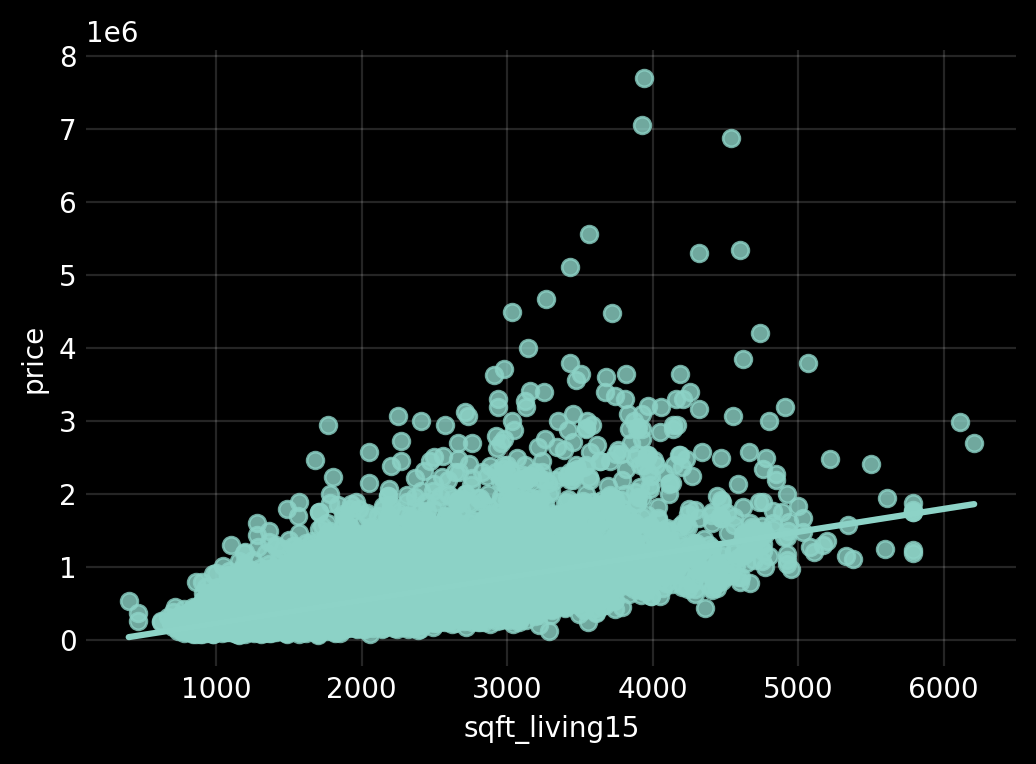

pcoeff: 0.59, pvalue: 0.0


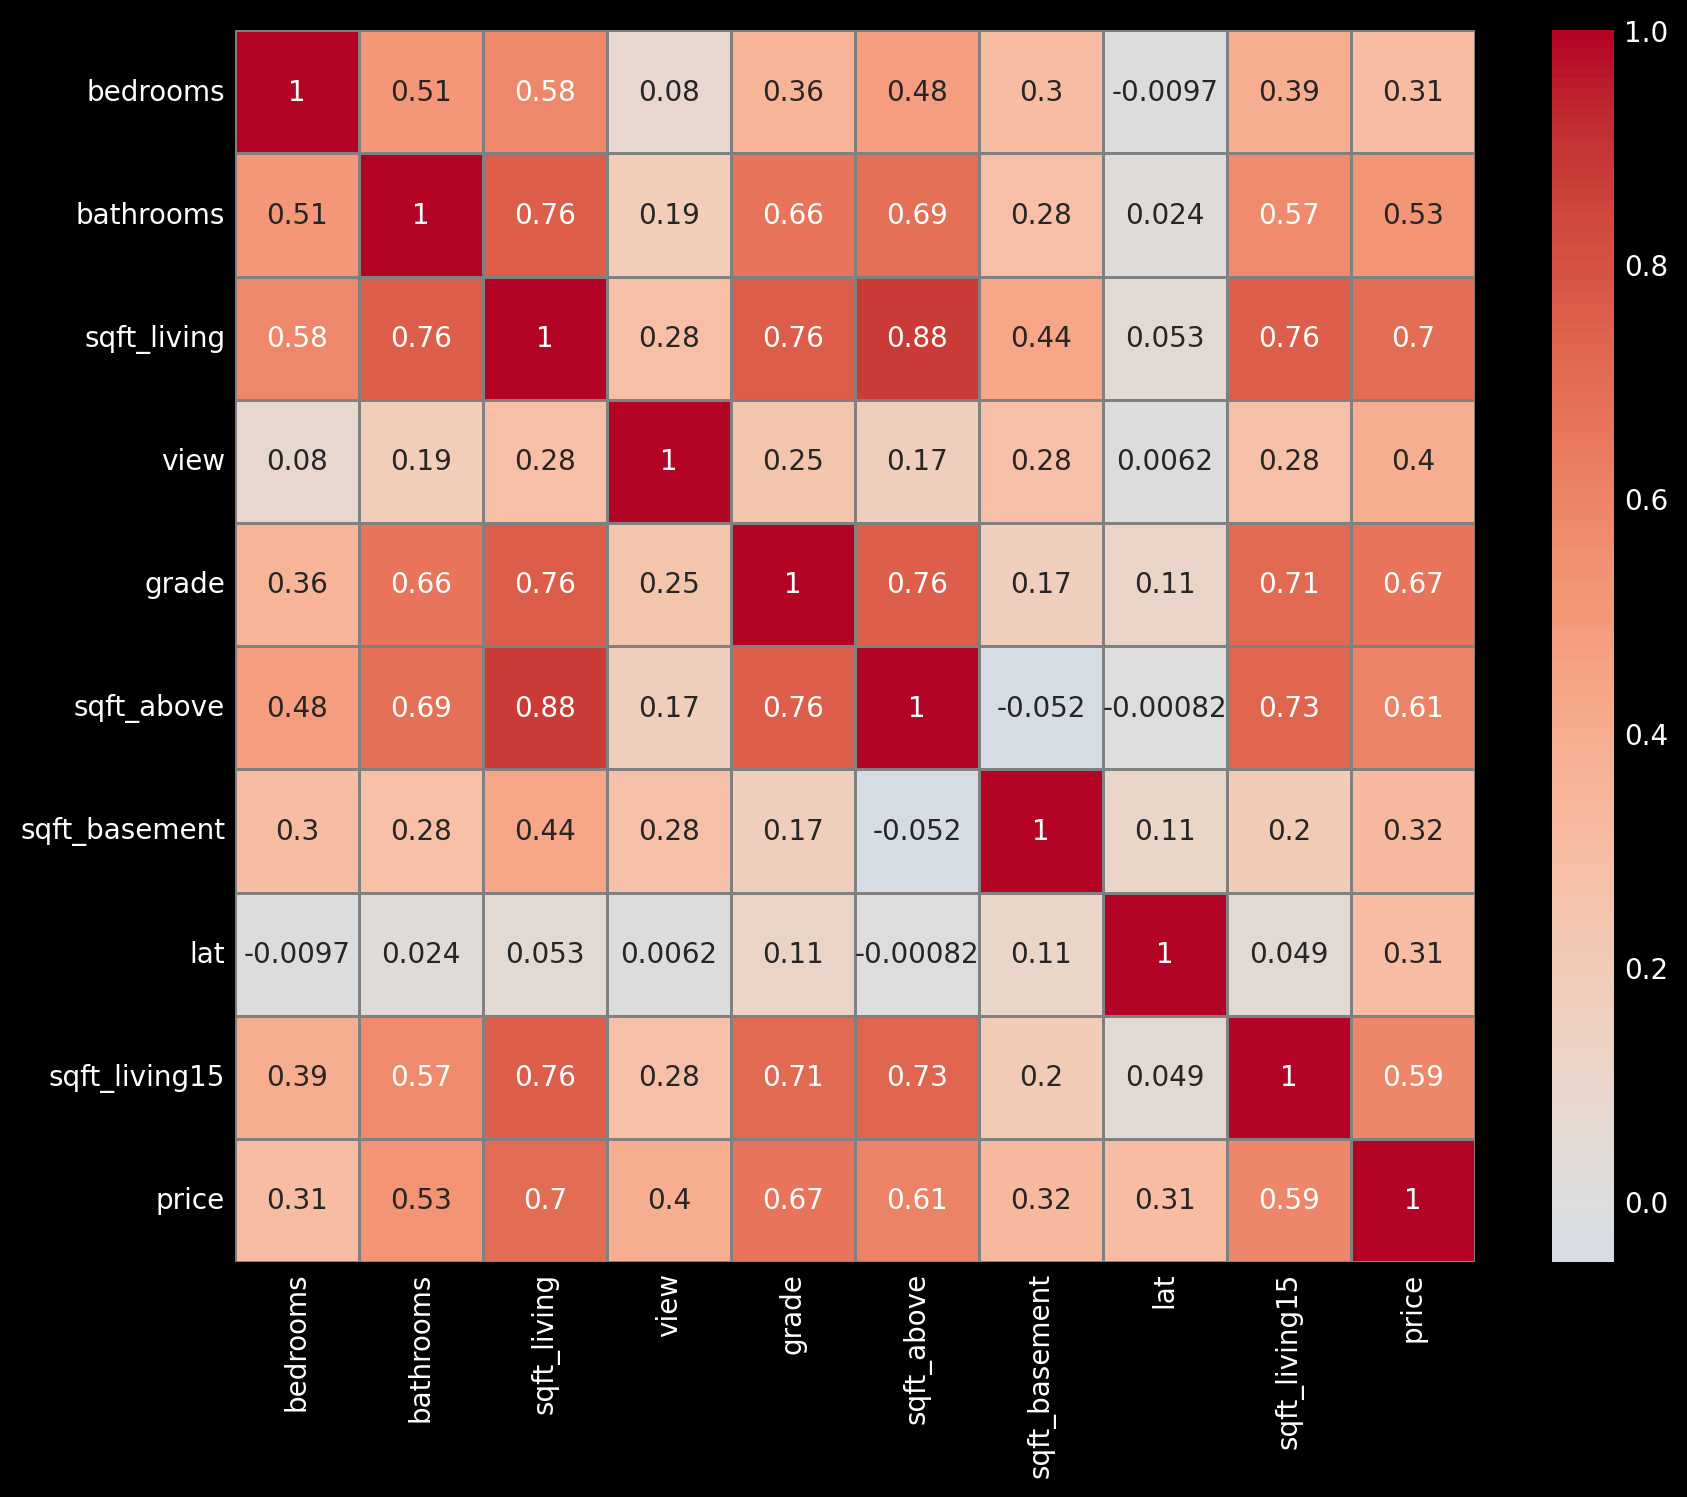

R^2 traindata (lr): 0.64
R^2 testdata (lr): 0.63
R^2 traindata (pr): 0.70
R^2 testdata (pr): 0.67


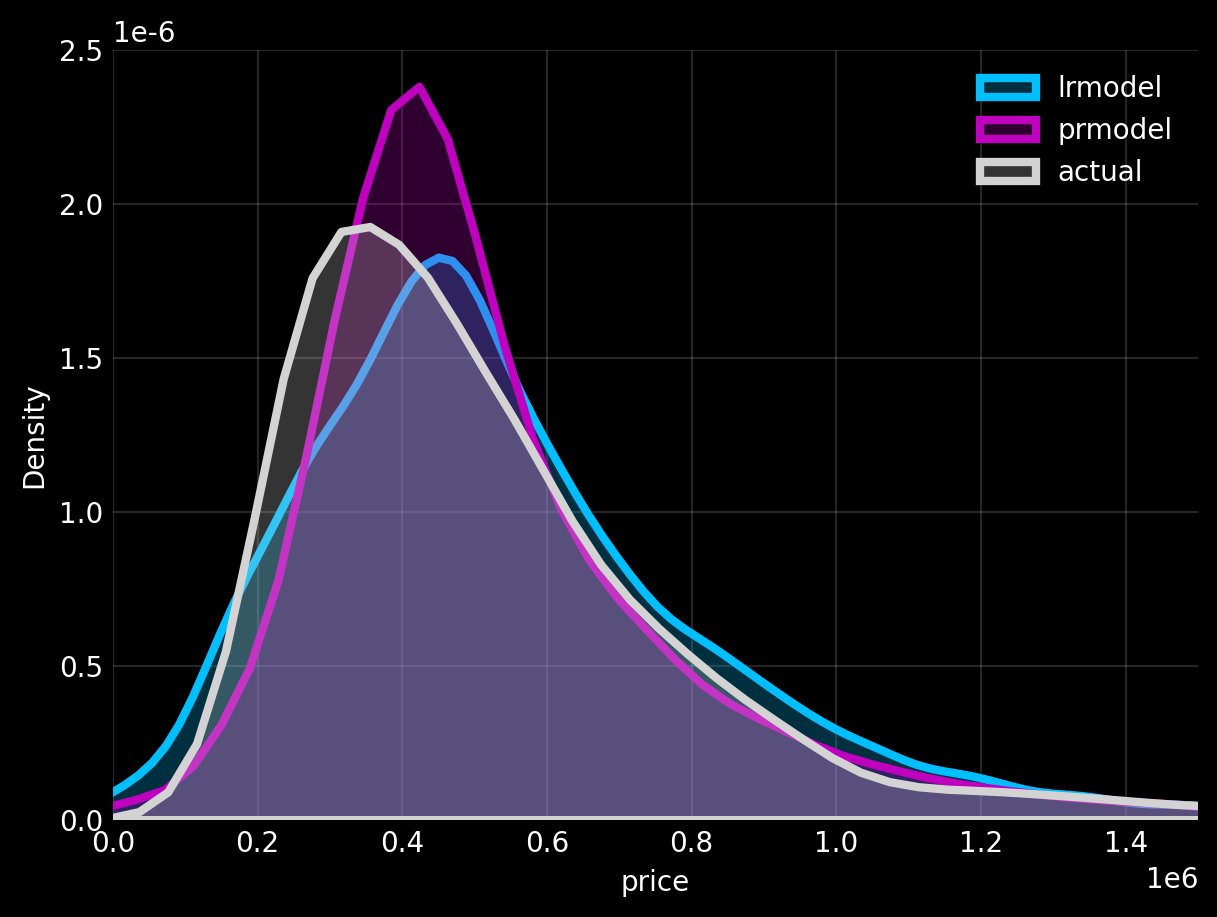

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats

plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')

df = pd.read_csv('house_data.csv')
df.drop(['Unnamed: 0','Unnamed: 1','id','date'],axis=1,inplace=True)
print(df.isna().any())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
print('Anzahl NaN in Bedrooms:',df['bedrooms'].isna().sum())
print('Anzahl NaN in Bathrooms:',df['bathrooms'].isna().sum())

numeric_attributes = list(df.select_dtypes(include=['int64','float64']).columns)
numeric_attributes.remove('price')

features = []

for attribute in numeric_attributes:
    pcoeff,pvalue = stats.pearsonr(df[attribute],df['price'])
    if abs(pcoeff) >= 0.3:
        features.append(attribute)
        plt.figure(figsize=(6,4))
        if df[attribute].value_counts().count() <= 10:
            sns.boxplot(x=df[attribute],y=df['price'])
            plt.grid(True,alpha=0.15)
            plt.show()
            print(f'pcoeff: {pcoeff:.2f}, pvalue: {pvalue}')
        else:
            sns.regplot(x=df[attribute],y=df['price'],data=df)
            plt.grid(True,alpha=0.15)
            plt.show()
            print(f'pcoeff: {pcoeff:.2f}, pvalue: {pvalue}')

features.append('price')
plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(),cmap='coolwarm',annot=True,center=0,cbar=True,linecolor='gray',linewidths=1)
plt.show()
features.remove('price')

x = df[features]
y = df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

lr = LinearRegression()
lr.fit(x_train,y_train)
print(f'R^2 traindata (lr): {cross_val_score(lr,x_train,y_train,cv=10).mean():.2f}')
print(f'R^2 testdata (lr): {lr.score(x_test,y_test):.2f}')

Input = [('scaler',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('ridge',Ridge(alpha=1))]
pipe = Pipeline(Input)
pipe.fit(x_train,y_train)
print(f'R^2 traindata (pr): {cross_val_score(pipe,x_train,y_train,cv=10).mean():.2f}')
print(f'R^2 testdata (pr): {pipe.score(x_test,y_test):.2f}')

plt.figure(figsize=(7,5))
sns.kdeplot(lr.predict(x_train),color='deepskyblue',label='lrmodel',linewidth=3,fill=True)
sns.kdeplot(pipe.predict(x_train),color='m',label='prmodel',linewidth=3,fill=True)
sns.kdeplot(y_train,color='lightgrey',label='actual',linewidth=3,fill=True)
plt.grid(True,alpha=0.15)
plt.xlim(0,1.5e6)
plt.legend()
plt.show()